In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
df=pd.DataFrame({
    "Study_Hours":[1,2,3,4,5],
    "Marks":[2,4,5,4,5]
})

In [19]:
df

,Study_Hours,Marks
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [20]:
X=df[["Study_Hours"]]
y=df["Marks"]

In [21]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [22]:
X_line = pd.DataFrame(
    {'Study_Hours': np.linspace(X.min()[0], X.max()[0], 100)}
)
y_line = model.predict(X_line)

C:\Users\Dell PC\AppData\Local\Temp\ipykernel_2656\3480316716.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  {'Study_Hours': np.linspace(X.min()[0], X.max()[0], 100)}


In [23]:
X_line

,Study_Hours
0,1.000000
1,1.040404
2,1.080808
3,1.121212
4,1.161616
...,...
95,4.838384
96,4.878788
97,4.919192
98,4.959596


In [24]:
print("Slope (m):", model.coef_[0])
print("Intercept (b):", model.intercept_)

Slope (m): 0.6
Intercept (b): 2.2


In [25]:
X_new = pd.DataFrame({'Study_Hours': [4.0]})
y_new = model.predict(X_new)

In [26]:
print("Predict Value:",y_new)

Predict Value: [4.6]


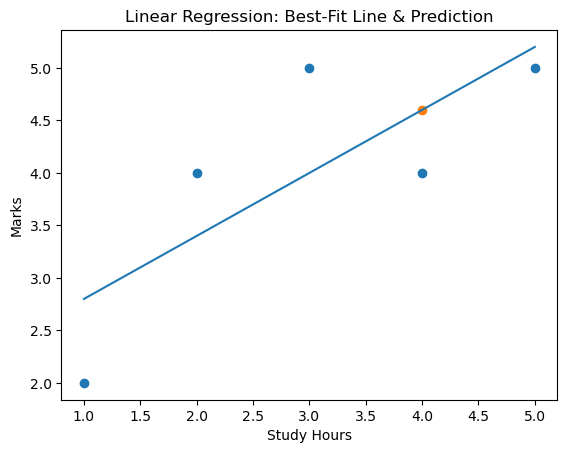

In [27]:
# plot
plt.figure()
plt.scatter(X,y)
plt.plot(X_line,y_line)
plt.scatter(X_new,y_new)
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Linear Regression: Best-Fit Line & Prediction")
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

print("MSE:", mse)



MSE: 0.47999999999999987


# MULTI LINEAR REGRESSION

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
df=pd.read_csv( "MLR_Study_marks.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'MLR_Study_marks.csv'

In [ ]:
df

In [ ]:
print("\nDataset info:")
print(df.info())

In [ ]:
X =df[["Study_Hours", "Attendance", "Sleep_Hours"]]
y = df["Marks"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [32]:
# step 4: Train Model
# --------------------------
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:

print("Intercept:", model.intercept_)
print("slope:", model.coef_)

Intercept: 1.7714285714285714
slope: [0.68571429]


In [34]:
# step 5: predictions
y_pred = model.predict(X_test)

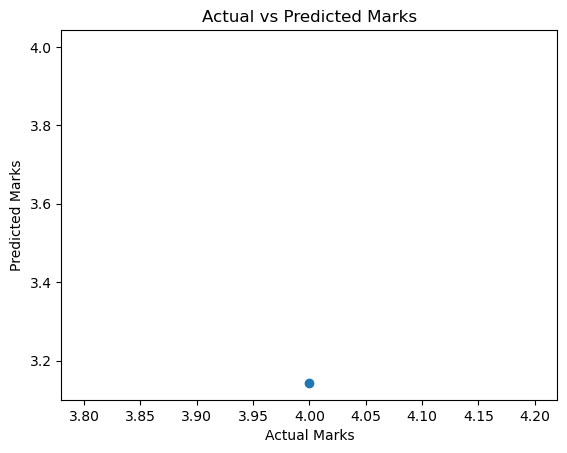

In [35]:
# Step 6: Residual Plot)
# --------------------------
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

In [36]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:",mse)


Mean Squared Error: 0.7346938775510206


KeyError: 'Attendance'

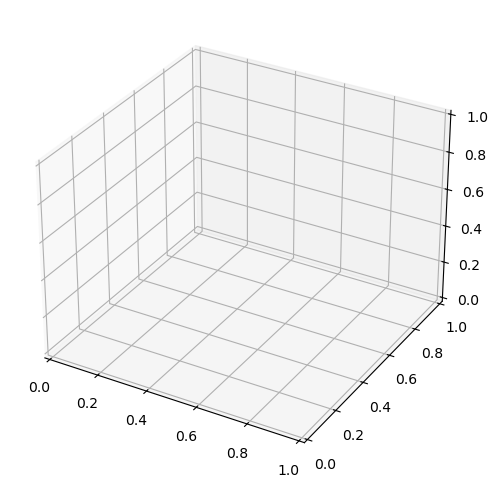

In [37]:
# step 7:3D plot (Study_Hours, Attendance vs Marks)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection= '3d')
ax.scatter(df["Study_Hours"], df["Attendance"], df["Marks"], c='b', marker='o')
ax.set_xlabel("Study_Hours")
ax.set_ylabel("Attendence")
ax.set_zlabel("Marks")
ax.set_title("3D plot: Study Hours & Attendance vs Marks")
plt.show()